In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install anesthetic
import os
os.chdir("/content/drive/MyDrive/project")

In [3]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from np_utils import simple_data, curved_data
from torch_utils import TrainUtil
from anesthetic.plot import kde_contour_plot_2d
from tension_net import TensionNet1, TensionNet2
from tension_quantify import BayesFactor, SuspiciousnessKLDiv

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
X0, X1, X_prior = simple_data(dims=6, distance=5)

In [6]:
tension_R = TensionNet2(6, hidden_size=(64, 32))
criterion = BayesFactor(hist_type="gaussian", hist_param=1, n_dist_bins=100, 
                        n_prior_bins=50)
optimizer = optim.Adam(tension_R.parameters(), lr=0.0005)

train_util_R = TrainUtil(tension_R, optimizer, criterion, device,
                         animation=False)
losses_R = train_util_R.train(X0, X1, X_prior, n_iter=500)

In [7]:
tension_S = TensionNet2(6, hidden_size=(64, 32))
criterion = SuspiciousnessKLDiv(hist_type="gaussian", hist_param=1,
                                n_dist_bins=100, n_prior_bins=50)
optimizer = optim.Adam(tension_S.parameters(), lr=0.0005)

train_util_S = TrainUtil(tension_S, optimizer, criterion, device, 
                        animation=False)
losses_S = train_util_S.train(X0, X1, X_prior, n_iter=500)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


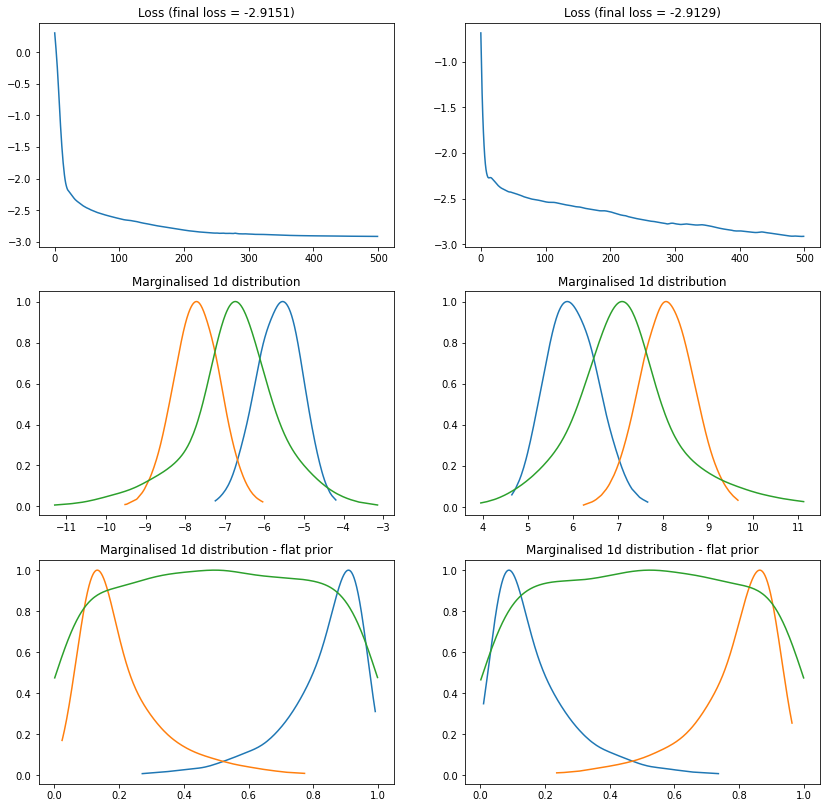

In [17]:
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

train_util_R.plot_loss(axs[0, 0])
# train_util_R.visualise_coordinate(axs[1, 0], idxs=(0, 1))
# train_util_R.visualise_tension(axs[2, 0], idxs=(0, 1))
train_util_R.plot_marginalised_dists(axs[1, 0])
train_util_R.plot_marginalised_dists(axs[2, 0], flat_prior=True)

train_util_S.plot_loss(axs[0, 1])
# train_util_S.visualise_coordinate(axs[1, 1], idxs=(0, 1))
# train_util_S.visualise_tension(axs[2, 1], idxs=(0, 1))
train_util_S.plot_marginalised_dists(axs[1, 1])
train_util_S.plot_marginalised_dists(axs[2, 1], flat_prior=True)

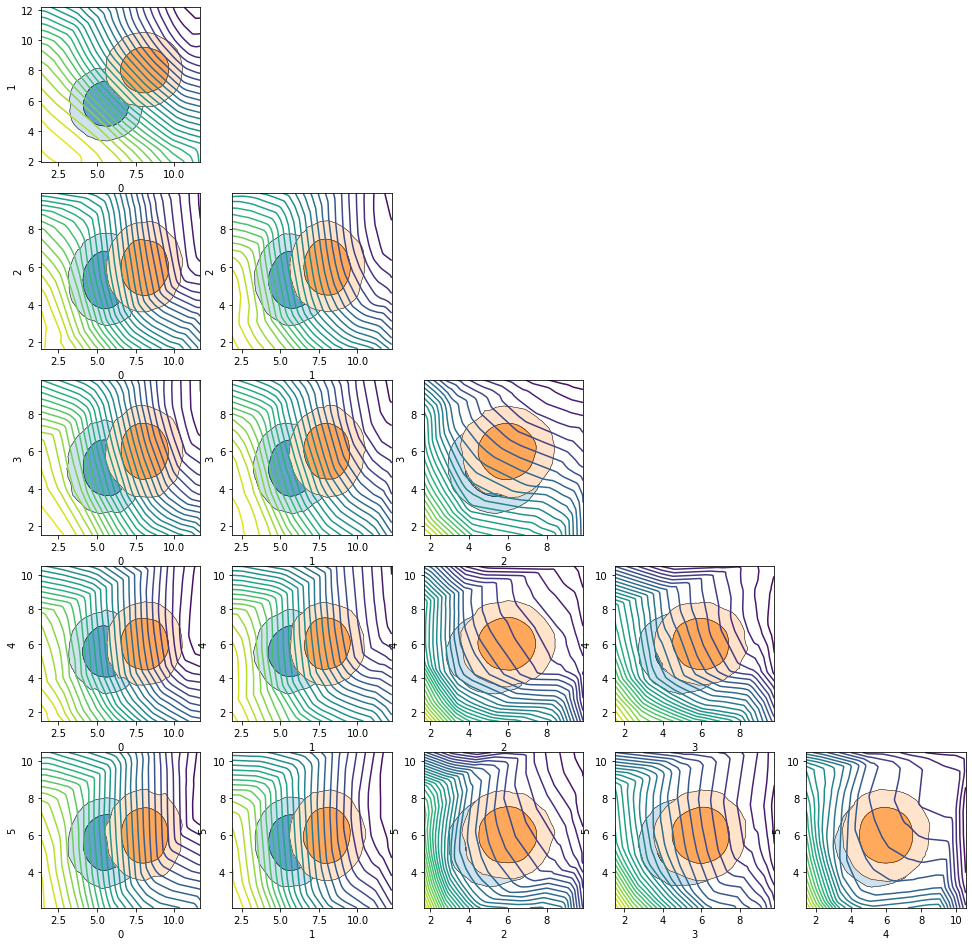

In [15]:
fig, axs = plt.subplots(6, 6, figsize=(20, 20))
for i in range(6):
    for j in range(6):
        if i > j:
            train_util_R.visualise_coordinate(axs[i, j], idxs=(j, i))
            axs[i, j].set_title("")
            axs[i, j].set_xlabel(j)
            axs[i, j].set_ylabel(i)
        else:
            fig.delaxes(axs[i, j])

In [5]:
X0_c, X1_c, X_prior_c = curved_data(dims=6)

In [22]:
tension_R_c = TensionNet2(6, hidden_size=(64, 32))
criterion = BayesFactor(hist_type="gaussian", hist_param=1, n_dist_bins=100, 
                        n_prior_bins=50)
optimizer = optim.SGD(tension_R_c.parameters(), lr=0.0001)

train_util_R_c = TrainUtil(tension_R_c, optimizer, criterion, device,
                         animation=False)
losses_R_c = train_util_R_c.train(X0_c, X1_c, X_prior_c, n_iter=2000)

In [23]:
tension_S_c = TensionNet2(6, hidden_size=(64, 32))
criterion = SuspiciousnessKLDiv(hist_type="gaussian", hist_param=1,
                                n_dist_bins=100, n_prior_bins=50)
optimizer = optim.SGD(tension_S_c.parameters(), lr=0.0001)

train_util_S_c = TrainUtil(tension_S_c, optimizer, criterion, device, 
                        animation=False)
losses_S_c = train_util_S_c.train(X0_c, X1_c, X_prior_c, n_iter=2000)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2398: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


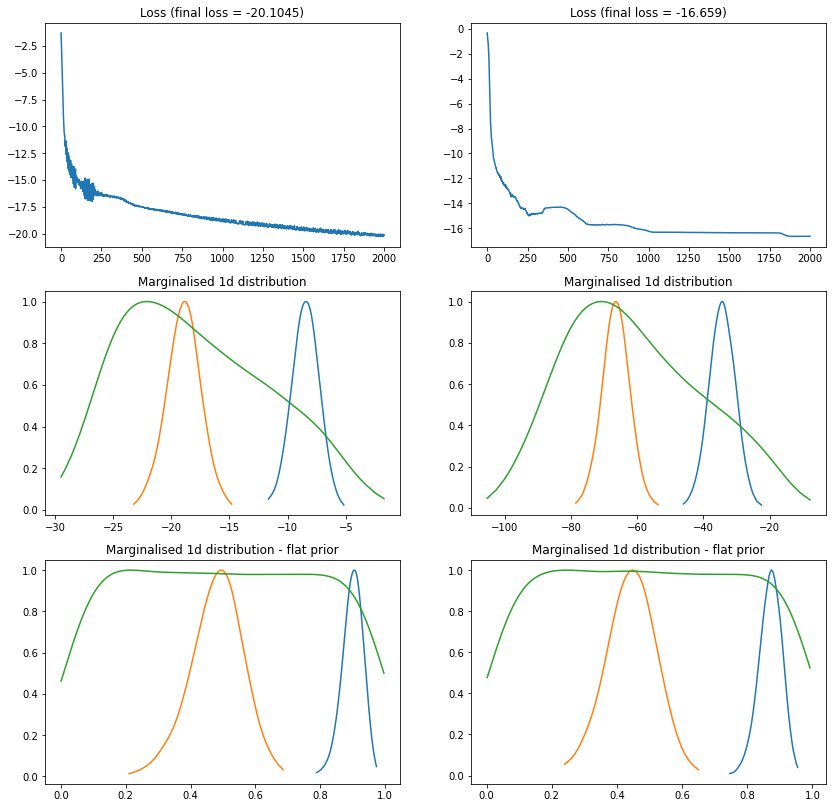

In [24]:
fig, axs = plt.subplots(3, 2, figsize=(14, 14))

train_util_R_c.plot_loss(axs[0, 0])
# train_util_R_c.visualise_coordinate(axs[1, 0], idxs=(0, 1))
# train_util_R_c.visualise_tension(axs[2, 0], idxs=(0, 1))
train_util_R_c.plot_marginalised_dists(axs[1, 0])
train_util_R_c.plot_marginalised_dists(axs[2, 0], flat_prior=True)

train_util_S_c.plot_loss(axs[0, 1])
# train_util_S_c.visualise_coordinate(axs[1, 1], idxs=(0, 1))
# train_util_S_c.visualise_tension(axs[2, 1], idxs=(0, 1))
train_util_S_c.plot_marginalised_dists(axs[1, 1])
train_util_S_c.plot_marginalised_dists(axs[2, 1], flat_prior=True)

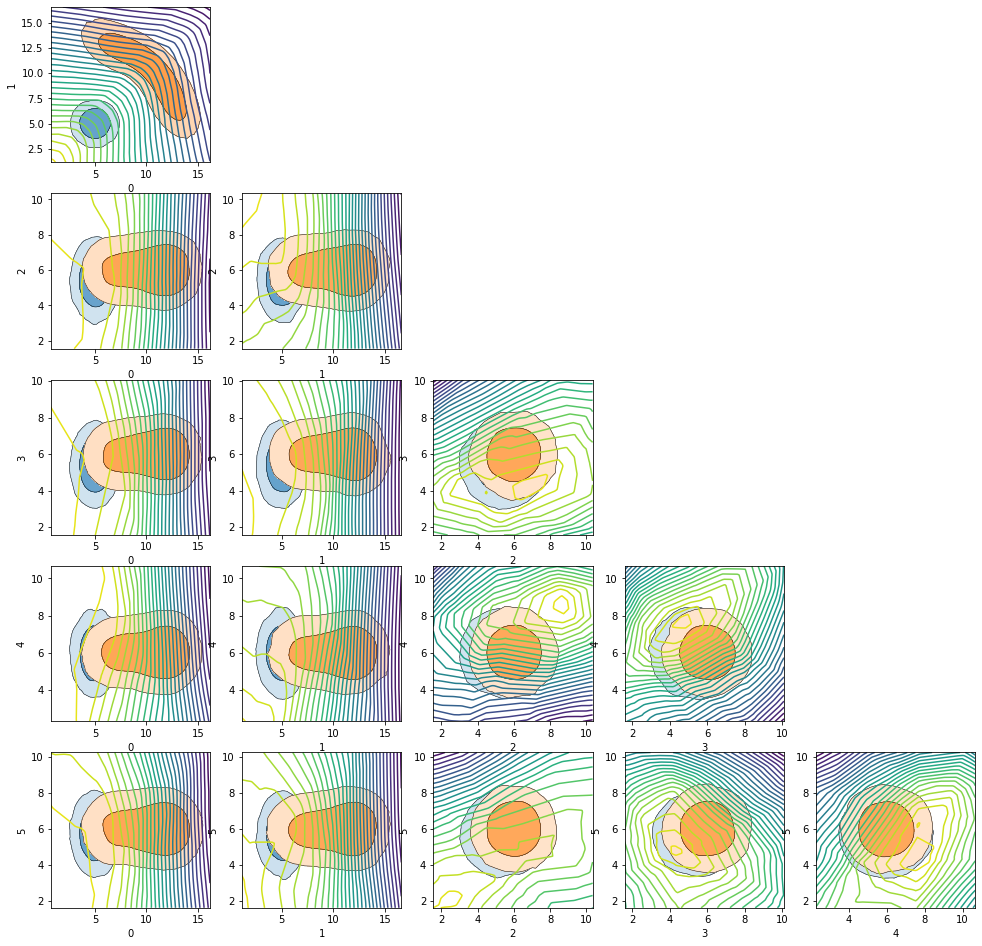

In [25]:
fig, axs = plt.subplots(6, 6, figsize=(20, 20))
for i in range(6):
    for j in range(6):
        if i > j:
            train_util_R_c.visualise_coordinate(axs[i, j], idxs=(j, i))
            axs[i, j].set_title("")
            axs[i, j].set_xlabel(j)
            axs[i, j].set_ylabel(i)
        else:
            fig.delaxes(axs[i, j])